## Keras

In [1]:
import keras

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

### Steps to follow:
1. Create the model
2. Compile the model
3. Train the model
4. Predict new data
5. Save the model for future estimates/data

In [3]:
# Load only the resources you need, to optimize
from keras.models import Sequential
from keras.layers import Dense

import numpy as np

In [4]:
# Load the training data
training_data = np.array([[0,0], [0,1], [1,0], [1,1]], "float32")  # single precision float: sign bit, 8 bits exponent, 23 bits mantissa

In [5]:
# Load the (real) results data
target_data = np.array([[0], [1], [1], [0]], "float32")

In [6]:
# Create our model
model = Sequential()  # built layers on top of it

# Connects with n neurons/perceptrons, has x inputs, activation function
model.add(Dense(3, input_dim = 2, activation = "tanh"))

model.add(Dense(1, activation = "sigmoid"))

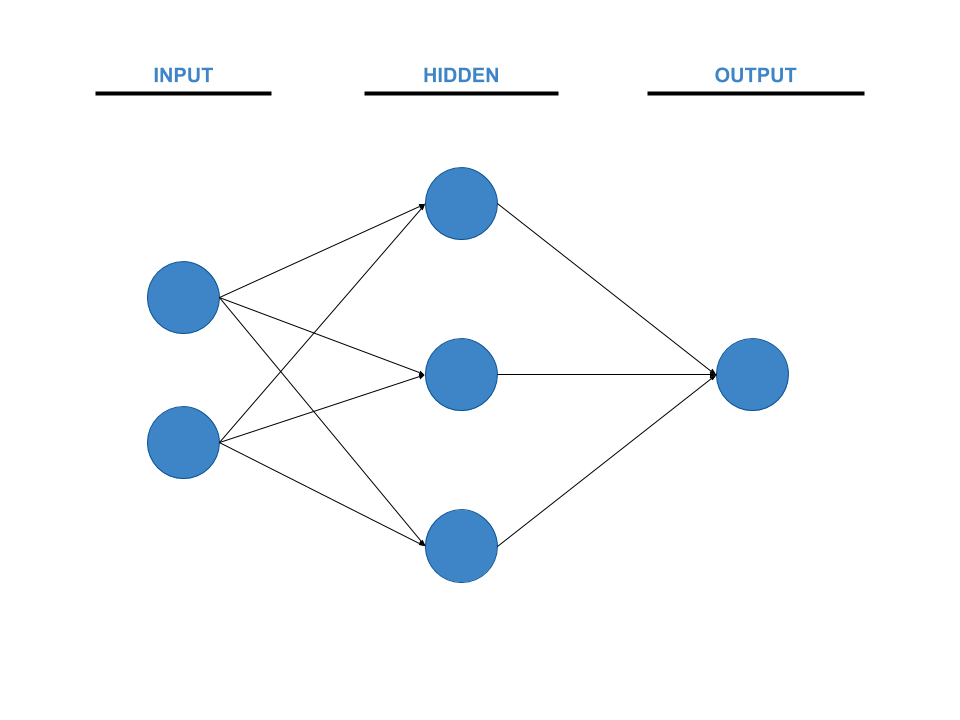

In [7]:
# IMAGE
from IPython.display import Image
Image("Model.png")

In [8]:
# Compile the model
model.compile(loss = "mean_squared_error", 
              optimizer = "adam", 
              metrics = ["binary_accuracy"])

# Loss: estimate the loss of the model so that the weights can be updated to reduce the loss on the next evaluation
# Optimizer: (backpropagation)
# Metrics: monitors and visualizes (print) the performance (accuracy) of the model

In [9]:
# Train and optimize the model
history = model.fit(training_data, target_data, epochs = 200)  
# Collect the history of the fitting process, in order to visualize the learning of the model later

# Hypermetric: 
# - Epochs: number of learning iterations

Epoch 1/200
4/4 [==============================] - 0s 60ms/step - loss: 0.2511 - binary_accuracy: 0.7500
Epoch 2/200
4/4 [==============================] - 0s 393us/step - loss: 0.2510 - binary_accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 0s 594us/step - loss: 0.2509 - binary_accuracy: 0.5000
Epoch 4/200
4/4 [==============================] - 0s 411us/step - loss: 0.2508 - binary_accuracy: 0.5000
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2506 - binary_accuracy: 0.5000
Epoch 6/200
4/4 [==============================] - 0s 935us/step - loss: 0.2505 - binary_accuracy: 0.5000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2504 - binary_accuracy: 0.5000
Epoch 8/200
4/4 [==============================] - 0s 989us/step - loss: 0.2503 - binary_accuracy: 0.5000
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2501 - binary_accuracy: 0.5000
Epoch 10/200
4/4 [==============================] - 0

In [10]:
# Evaluate the training data
model.evaluate(training_data, target_data)

4/4 [==============================] - 0s 9ms/step


[0.23358571529388428, 0.75]

In [11]:
# Predict the results of the training data
model.predict(training_data).round()

array([[0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

## Visualization

In [12]:
import matplotlib.pyplot as plt

In [13]:
# x-axis = array of epochs (length of history)
# y = history of accuracy

epochs = range(1, len(history.history["loss"]) + 1, 1)  # starting point, last point, steps

In [14]:
# Automating the chart data
historyKeys = list(history.history.keys())

historyKeysLoss = historyKeys[0]
trained_model_Loss = history.history[historyKeysLoss]  # "loss"

historyKeysMetrics = historyKeys[1]
trained_model_Metrics = history.history[historyKeysMetrics]  # "binary_accuracy"

<Figure size 2400x1800 with 0 Axes>

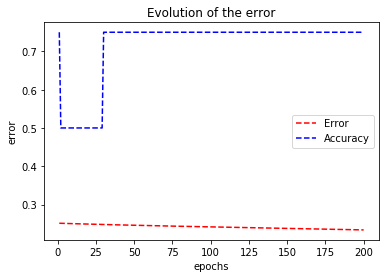

<Figure size 2400x1800 with 0 Axes>

In [15]:
plt.plot(epochs, trained_model_Loss, "r--", label = "Error")
plt.plot(epochs, trained_model_Metrics, "b--", label = "Accuracy")
plt.title("Evolution of the error")
plt.ylabel("error")
plt.xlabel("epochs")
plt.legend()  # show legend
plt.savefig('chart.png', figsize = (8, 6), dpi = 300, transparent = True)
plt.figure(figsize = (8, 6), dpi = 300)  # execute all

## Save the model

In [16]:
model.save("MyNetworkXOR.h5") 